<a href="https://colab.research.google.com/github/Fikaaw/quantitative-finance/blob/main/algorithmic_trading_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design and backtest trading algorithms using strategies like momentum trading, mean reversion, or pairs trading.


[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-9ce2217965a3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['MA50'][50:] > data['MA200'][50:], 1, 0)  # Buy signal


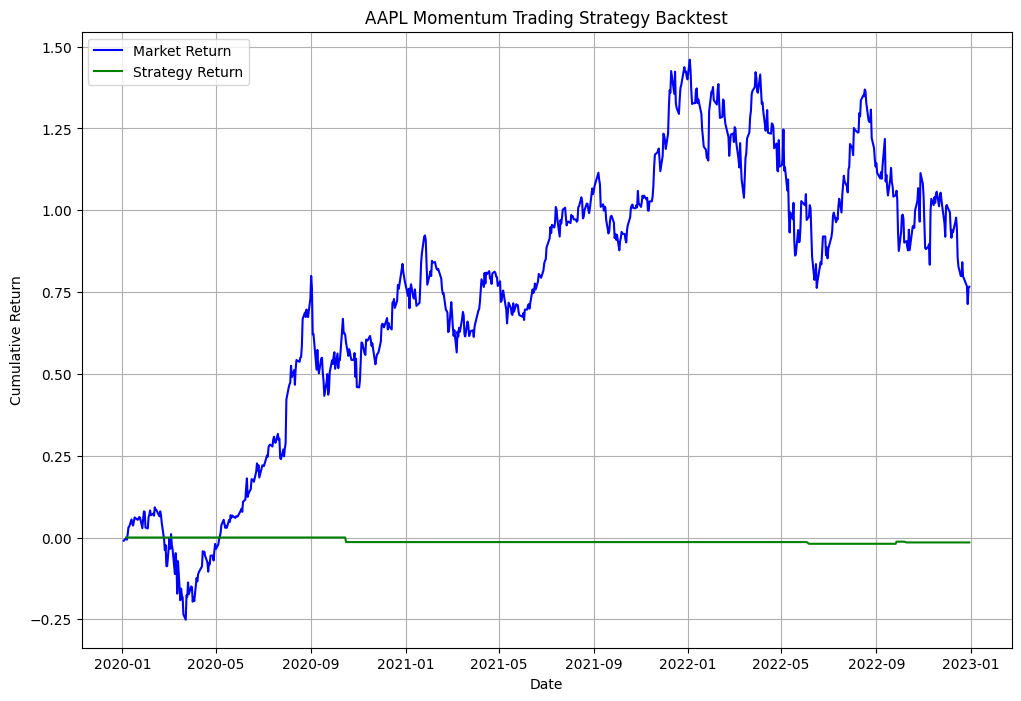

Final Market Return: 0.77
Final Strategy Return: -0.02


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download historical stock data
ticker = "AAPL"  # Apple Inc.
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
data['Return'] = data['Adj Close'].pct_change()

# Step 2: Calculate Moving Average as a momentum indicator
data['MA50'] = data['Adj Close'].rolling(window=50).mean()
data['MA200'] = data['Adj Close'].rolling(window=200).mean()

# Step 3: Define Trading Strategy (Simple Moving Average Crossover)
data['Signal'] = 0
data['Signal'][50:] = np.where(data['MA50'][50:] > data['MA200'][50:], 1, 0)  # Buy signal
data['Position'] = data['Signal'].diff()

# Step 4: Backtest the Strategy
data['Strategy Return'] = data['Return'] * data['Position'].shift(1)

# Step 5: Calculate Cumulative Returns
data['Cumulative Market Return'] = (1 + data['Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Step 6: Plot the Results
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Cumulative Market Return'], label='Market Return', color='blue')
plt.plot(data.index, data['Cumulative Strategy Return'], label='Strategy Return', color='green')
plt.title(f'{ticker} Momentum Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Print final cumulative returns
print(f"Final Market Return: {data['Cumulative Market Return'].iloc[-1]:.2f}")
print(f"Final Strategy Return: {data['Cumulative Strategy Return'].iloc[-1]:.2f}")
